# Projet Text Analysis
## Havard Josquin

Le but est ici de faire un classifieur sur les documents de la database tobaco.

- Les données seront représentés sous forme de bag of word.

- Le classifieur utilisé sera un SVM

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC

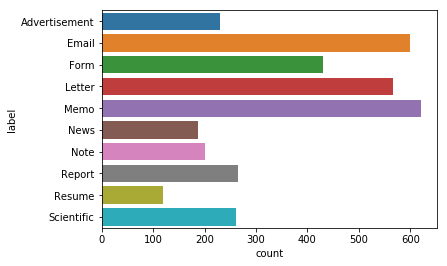

In [2]:
df = pd.read_csv('data/Tobacco3482.csv')

sns.countplot(data=df,y='label')

### Récupération des données

In [3]:
file_name_path = df.img_path
N = len(file_name_path)
list_text = []

for i in range(N):
    file_name = file_name_path[i]
    file_name = file_name.replace('.jpg','.txt')
    with open('data/'+file_name) as my_file:
        my_str = ''
        for line in my_file:
            my_str += line
        list_text.append(my_str)
    if i % 100 == 0 :
        print(str(i) +' / '+str(N) + ' faits',end='\r')

print('Finit')

df['text'] = list_text

X = df.text

labels = list(set(df.label))
y = np.zeros(len(X),dtype='int')

for i in range(len(X)):
    y[i] = labels.index(df.label[i]) 
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Finit


In [4]:
df.sample(10)

,img_path,label,text
2574,News/2071620452_0454.jpg,News,Sua kwe Lovonees
304,Email/2073356804b.jpg,Email,"-----Original Message-----\nFrom: Desel, Paul..."
3294,Scientific/2026025182_2026025325.jpg,Scientific,INBIFO INSTITUT FUR BIOLOGISCHE FORSCHUNG\n\nK...
3378,Scientific/50085955_50085963.jpg,Scientific,LEAD CONTENT OF TOBACCO LEAVES\n\nFasavoe\n\na...
2747,Note/2051800478.jpg,Note,CHRIS E. HARDIN\n\n/2/lz\n\nlage —\n\nAtta CHe...
1764,Letter/71210664.jpg,Letter,BROWN & WILLIAMSON\nTOBACCO\n\nMrs. Corky Newt...
596,Email/2085136611b.jpg,Email,os Original Message---—-\n\nFrom: Karen.Chaiki...
1804,Letter/tnwl0002422.jpg,Letter,THE TOBACCO INSTITUTE\n\nSUITE 104 ALEXANDER H...
3445,Scientific/50649664-9664.jpg,Scientific,"Proc. Natl. Acad. Sci. USA\nVol. 87, pp. 6208-..."
484,Email/2081917771.jpg,Email,ee Rt ARTA TTR RAT\n10/06/90 10;08 FAX 804 274...


## Bag of word représentation

In [5]:
vectorizer = CountVectorizer(max_features=2000)
vectorizer.fit(X_train)
X_train_counts = vectorizer.transform(X_train)
X_test_counts = vectorizer.transform(X_test)

### Classification

In [6]:
for i in range(len(labels)):
    print(str(i) + ' -> ' + labels[i])

0 -> Form
1 -> News
2 -> Letter
3 -> Resume
4 -> Scientific
5 -> Memo
6 -> Note
7 -> Advertisement
8 -> Report
9 -> Email


In [7]:
clf = SVC(gamma='scale')

clf.fit(X_train_counts, y_train)

predict_label_counts = clf.predict(X_test_counts)


class_counts = classification_report(y_test,predict_label_counts) 

matrice_counts = confusion_matrix(y_test,predict_label_counts)

print(class_counts)
print(matrice_counts)

              precision    recall  f1-score   support

           0       0.68      0.78      0.73        88
           1       0.86      0.74      0.79        34
           2       0.70      0.77      0.73       122
           3       1.00      1.00      1.00        15
           4       0.75      0.34      0.47        53
           5       0.65      0.79      0.71       109
           6       0.33      0.83      0.47        36
           7       1.00      0.11      0.19        57
           8       0.53      0.35      0.42        48
           9       0.94      0.92      0.93       135

   micro avg       0.69      0.69      0.69       697
   macro avg       0.74      0.66      0.65       697
weighted avg       0.75      0.69      0.68       697

[[ 69   0   2   0   0   4  12   0   0   1]
 [  3  25   0   0   2   2   1   0   1   0]
 [  4   0  94   0   0  20   1   0   3   0]
 [  0   0   0  15   0   0   0   0   0   0]
 [ 11   0   4   0  18  10   3   0   7   0]
 [  1   1  11   0   1  86 

## Etude des hypers paramètres

On étudie ici 3 hypers-paramètres : 

- Le noyau (RBF ou polynomial) 
- Le gamma pour RBF
- Le degrée pour polynomial

### Noyau RBF

In [24]:
dic_params = {
    'gamma' : np.logspace(-5,1,10),
}

clf = SVC(kernel='rbf')

grid_search = GridSearchCV(clf,dic_params, cv = 4)

t0 = time.time()

grid_search.fit(X_train_counts, y_train)

print('Finit en ' + str(time.time() - t0))

Finit en 235.60139918327332


In [25]:
print("Best score: %0.3f" % grid_search.best_score_)
print(grid_search.best_estimator_.get_params())

Best score: 0.694
{'max_iter': -1, 'cache_size': 200, 'kernel': 'rbf', 'verbose': False, 'gamma': 0.001, 'degree': 3, 'probability': False, 'class_weight': None, 'C': 1.0, 'decision_function_shape': 'ovr', 'shrinking': True, 'tol': 0.001, 'coef0': 0.0, 'random_state': None}


In [18]:
best_parameters = grid_search.best_estimator_.get_params()

clf = SVC(kernel='rbf',gamma=best_parameters['gamma'])

clf.fit(X_train_counts, y_train)

predict_label_counts = clf.predict(X_test_counts)

class_counts = classification_report(y_test,predict_label_counts) 

matrice_counts = confusion_matrix(y_test,predict_label_counts)

print(class_counts)
print(matrice_counts)

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        88
           1       0.88      0.68      0.77        34
           2       0.73      0.80      0.76       122
           3       1.00      1.00      1.00        15
           4       0.64      0.34      0.44        53
           5       0.66      0.80      0.72       109
           6       0.30      0.81      0.44        36
           7       1.00      0.16      0.27        57
           8       0.57      0.42      0.48        48
           9       0.95      0.92      0.94       135

   micro avg       0.70      0.70      0.70       697
   macro avg       0.74      0.66      0.65       697
weighted avg       0.75      0.70      0.69       697

[[ 65   0   1   0   0   4  18   0   0   0]
 [  3  23   0   0   5   1   1   0   1   0]
 [  3   0  97   0   0  18   1   0   3   0]
 [  0   0   0  15   0   0   0   0   0   0]
 [ 10   0   4   0  18  10   4   0   7   0]
 [  0   1  11   0   1  87 

### Noyau polynomial

In [22]:
dic_params = {
    'degree' : np.linspace(0,15,5),
}

clf = SVC(kernel='poly',gamma='scale')

grid_search = GridSearchCV(clf,dic_params, cv = 4)

t0 = time.time()

grid_search.fit(X_train_counts, y_train)

print('Finit en ' + str(time.time() - t0))

Finit en 106.87243604660034


In [23]:
print("Best score: %0.3f" % grid_search.best_score_)

Best score: 0.328


Le meilleur estimateur reste le SVM avec un noyau RBF et un gamma de 0.001.
On obtient une précision de 0.75 et un recall de 0.70.